In [33]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [34]:
I = cv2.imread('./01/lion.jpg')
J = cv2.imread('./01/lionHSV.jpg')

# I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
# J = cv2.cvtColor(J, cv2.COLOR_BGR2RGB)

2128 791


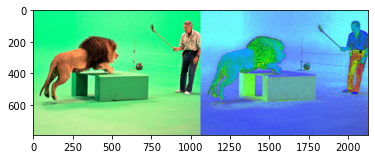

In [35]:
w = I.shape[1] + J.shape[1]
h = max(I.shape[0], J.shape[0])
print(w, h)

IJ = np.concatenate((cv2.cvtColor(I, cv2.COLOR_BGR2RGB), cv2.cvtColor(J, cv2.COLOR_BGR2RGB)), axis=1)
plt.imshow(IJ)

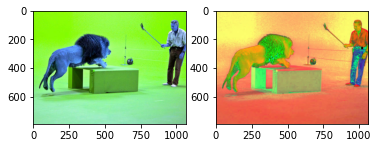

In [36]:
## hiển thị ảnh
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(I)
ax2.imshow(J)

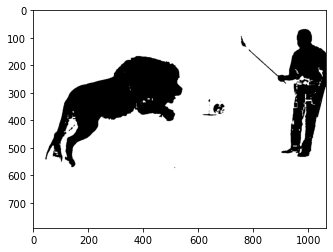

In [37]:
B = cv2.cvtColor(I, cv2.COLOR_BGR2HSV).astype(np.double)
Jh = B[:, :, 0]/180

for r in range(Jh.shape[0]):
    for c in range(Jh.shape[1]):
        if Jh[r, c] > 0.22 and Jh[r, c] < 0.45:
            Jh[r, c] = 1
        else:
            Jh[r, c] = 0
B = Jh*255
plt.imshow(B, cmap='gray')

In [38]:
data = np.loadtxt('./01/data.txt')

In [39]:
print(I[:, :, :][0].shape)

(1064, 3)


In [40]:
nmax = 255 + 5
lut = np.zeros((nmax, nmax, nmax))

In [41]:
for row in data:
    lut[row.astype(np.uint16)[2]][row.astype(np.uint16)[1]][row.astype(np.uint16)[0]] = 1-row.astype(np.uint16)[3]

In [42]:
for r in range(I.shape[0]):
    for c in range(I.shape[1]):
        I[r][c] = lut[I[r][c][0]][I[r][c][1]][I[r][c][2]] * I[r][[c]]

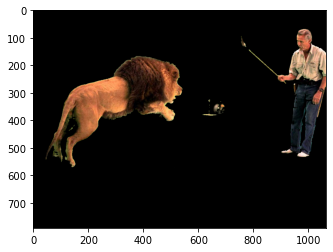

In [43]:
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))